<a href="https://colab.research.google.com/github/basnendarekop/SLO/blob/main/klasifikasi_daun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/Colab Notebooks


/content/drive/.shortcut-targets-by-id/1E4fw9dGoIh7HUl2WTMoe0VGDRsBoPbQe/Colab Notebooks


In [3]:
ls


'Copy of dataset'/         Klasifikasi_MNIST.ipynb       Pertamina.jpg
 dataset_daun/             Klasifikasi_MNIST_new.ipynb   RumahSakit.jpg
'Dataset MNIST'/           Latihan/                      Tes.jpg
 kapal.ipynb               mnist_test.csv                TLD.jpg
 KDA.jpg                   mnist_train.csv               Untitled0.ipynb
'klasifikasi daun.ipynb'   Multatuli.jpg


In [16]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os
print("[INFO] importing packages...")

[INFO] importing packages...


In [55]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset_daun")
data = []
labels = []

[INFO] loading images...


In [56]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((64, 64))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)
print(labels)

['GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11',

In [57]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [58]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(438, 64, 64, 3)
(147, 64, 64, 3)
(438, 5)
(147, 5)


In [77]:
#MODEL 2
# define our Convolutional Neural Network architecture
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same", input_shape=(64, 64, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
#model.add(Dense(100))
model.add(Dense(5))
model.add(Activation("sigmoid"))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
activation_82 (Activation)   (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
activation_83 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 16, 16, 32)      

In [87]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50)

[INFO] training network...
Epoch 1/50
14/14 [==============================] - 2s 130ms/step - loss: 0.5311 - accuracy: 0.1735 - val_loss: 0.5100 - val_accuracy: 0.1633
Epoch 2/50
14/14 [==============================] - 2s 121ms/step - loss: 0.5035 - accuracy: 0.2374 - val_loss: 0.4967 - val_accuracy: 0.1973
Epoch 3/50
14/14 [==============================] - 2s 118ms/step - loss: 0.4960 - accuracy: 0.2237 - val_loss: 0.4867 - val_accuracy: 0.2585
Epoch 4/50
14/14 [==============================] - 2s 122ms/step - loss: 0.4818 - accuracy: 0.3584 - val_loss: 0.4740 - val_accuracy: 0.3469
Epoch 5/50
14/14 [==============================] - 2s 118ms/step - loss: 0.4616 - accuracy: 0.4018 - val_loss: 0.4523 - val_accuracy: 0.3741
Epoch 6/50
14/14 [==============================] - 2s 118ms/step - loss: 0.4349 - accuracy: 0.4224 - val_loss: 0.4297 - val_accuracy: 0.4286
Epoch 7/50
14/14 [==============================] - 2s 117ms/step - loss: 0.4118 - accuracy: 0.4498 - val_loss: 0.4207 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


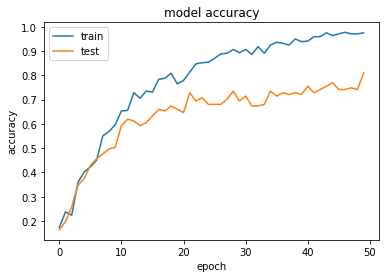

In [88]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

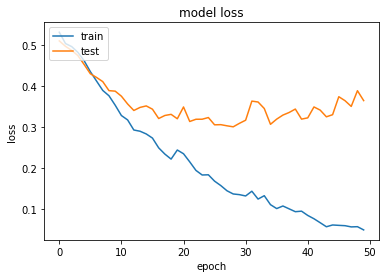

In [89]:
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [90]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.77      0.71      0.74        28
      GMB_02       0.84      0.79      0.81        33
      GMB_03       0.82      0.93      0.87        29
      GMB_10       0.77      0.83      0.80        24
      GMB_11       0.84      0.79      0.81        33

    accuracy                           0.81       147
   macro avg       0.81      0.81      0.81       147
weighted avg       0.81      0.81      0.81       147

